We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [1]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

We use a `DifferentialEquations` solver to construct an accurate approximation to the exact solution.

In [2]:
using DifferentialEquations
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

Now we perform a convergence study of our two Runge--Kutta implementations.

In [3]:
include("../FNC.jl")
n = @. 50*2^(0:5)
err_IE2 = zeros(size(n))
err_RK4 = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.ie2(f,tspan,u0,n)
    err_IE2[j] = maximum( @.abs(u_exact(t)-u) )
    t,u = FNC.rk4(f,tspan,u0,n)
    err_RK4[j] = maximum( @.abs(u_exact(t)-u) )
end

The amount of computational work at each time step is assumed to be proportional to the number of stages. Let's compare on an apples-to-apples basis by using the number of $f$-evaluations on the horizontal axis.

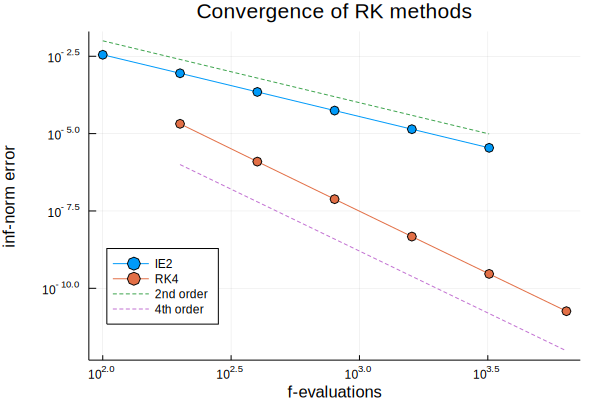

In [4]:
using Plots
plot([2n 4n],[err_IE2 err_RK4],m=:o,label=["IE2" "RK4"],
    xaxis=(:log10,"f-evaluations"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of RK methods",leg=:bottomleft)
plot!(2n,0.01*(n/n[1]).^(-2),l=:dash,label="2nd order")
plot!(4n,1e-6*(n/n[1]).^(-4),l=:dash,label="4th order")

The fourth-order variant is more efficient in this problem over a wide range of accuracy.